In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots
from matplotlib.backends.backend_pdf import PdfPages
import torsionfit.parameters as par
from collections import OrderedDict
import numpy as np
from pymbar.timeseries import detectEquilibration
import tqdm

In [3]:
param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')]
param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_cgenff.rtf', 
                           '../../../../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../../../../structure/butane.psf'
scan = '../../../../torsion_scans/MP2_torsion_scan/'
# Print initial guess

# Create a butane scan with torsions on (to compare for difference potential)
butane_scan = ScanSet.parse_psi4_out(scan, structure)
optimized = butane_scan.remove_nonoptimized()
optimized.compute_energy(param)

# Turn off torsion
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0

# Create butane scan with torsions off
optimized_0 = butane_scan.remove_nonoptimized()
optimized_0.compute_energy(param)

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 467, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 467, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 467, line not all dashes as expected: ---------------------------------------------------------------------------------------------

/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.560.g3807c3e.dirty-py3.5.egg/torsionfit/database/qmdatabase.py:188: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 467, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 467, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/butane/sampling_torsions/c_c_c_c_torsion/n5/10000/../../../../torsion_scans/MP2_torsion_scan/60/butane_60.out2 WARNING] In logfileparser.py, line 467, line not all dashes as expected: -------------------------------------------------------------------------------------------

In [5]:
# Load samplers
dbs = OrderedDict()
for i in range(25):
    dbs['db_{}'.format(i)] = sqlite_plus.load('random_10000_{}/random_10000_{}.sqlite'.format(i, i))

<DihedralTypes [<DihedralType; phi_k=0.157, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.001, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.134, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.126, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.109, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.092, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.158, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=-0.001, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.125, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.119, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.109, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.086, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.155, per=2, phase=0.000,  scee=1.0

/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<DihedralTypes [<DihedralType; phi_k=0.158, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=-0.000, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.132, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.121, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.107, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.087, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.158, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.002, per=6, phase=180.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.139, per=1, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.123, per=3, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.103, per=4, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=0.089, per=5, phase=0.000,  scee=1.000, scnb=1.000>]>
<DihedralTypes [<DihedralType; phi_k=0.159, per=2, phase=0.000,  scee=1.0

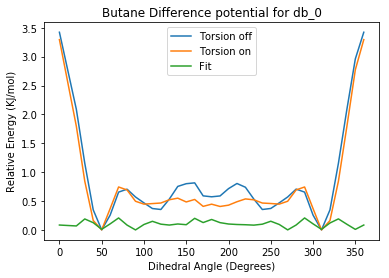

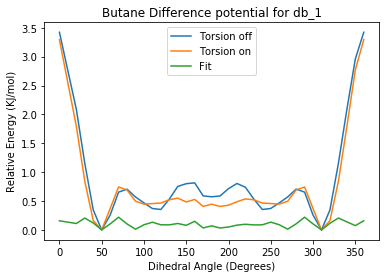

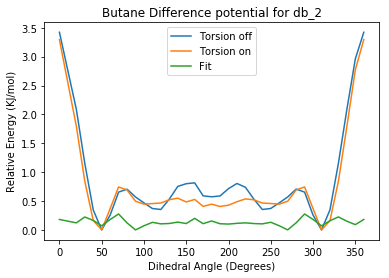

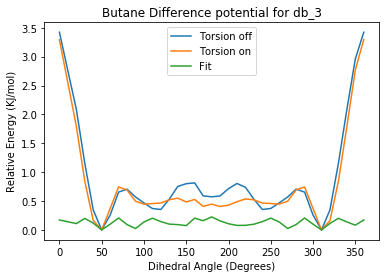

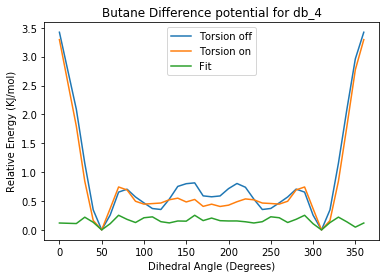

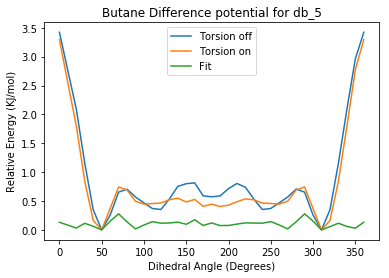

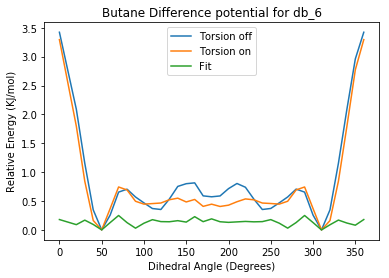

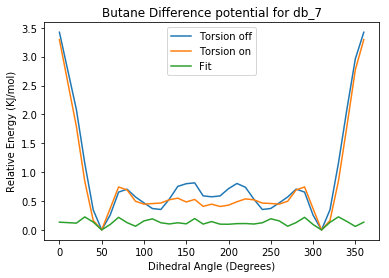

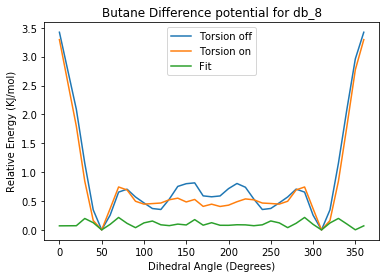

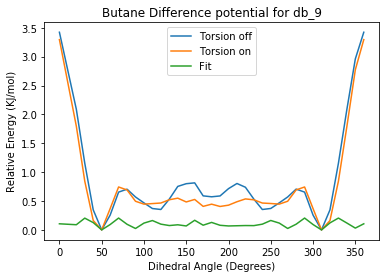

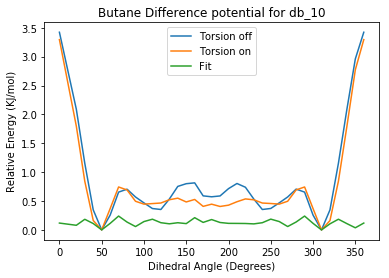

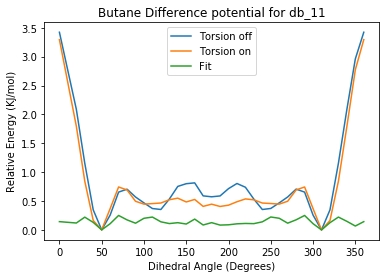

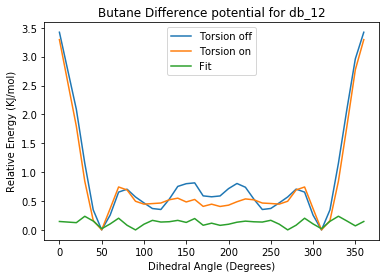

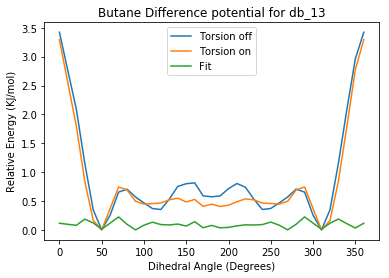

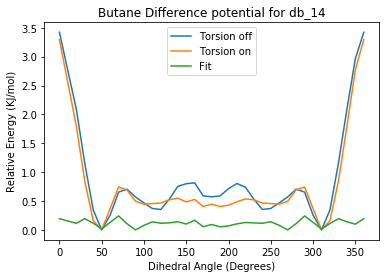

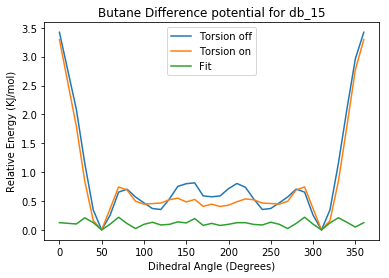

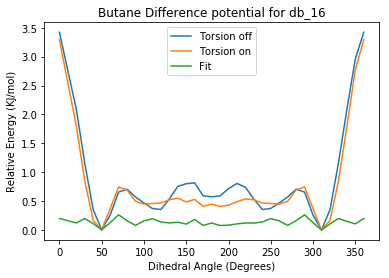

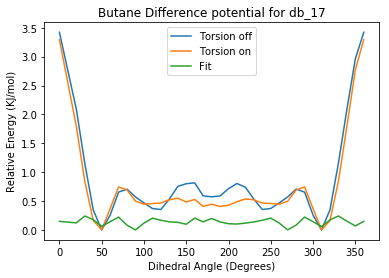

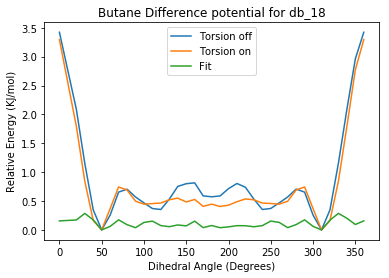

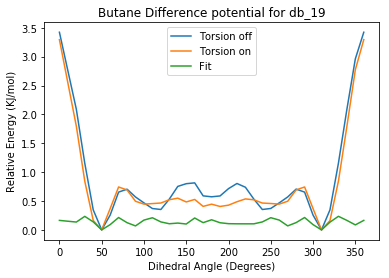

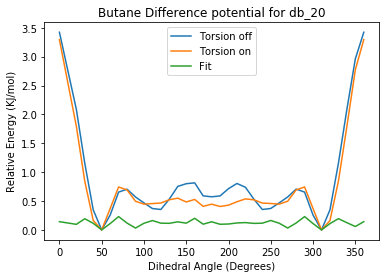

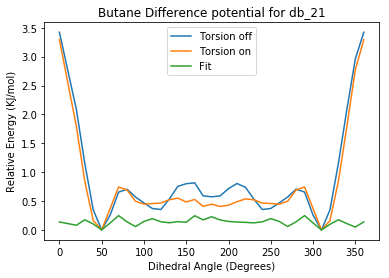

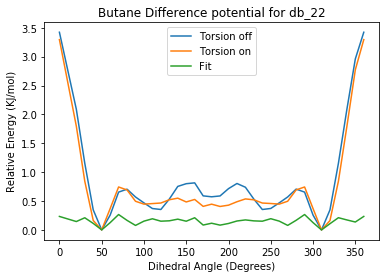

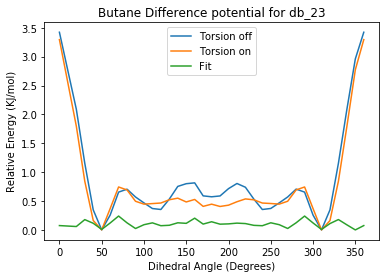

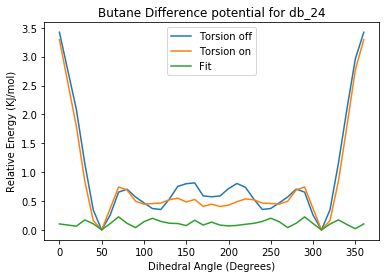

In [10]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
with PdfPages('difference_potential.pdf') as pdf:
    # Update parameters
    for db in dbs:
        plt.figure()
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=True, rj=False)

        # Check
        print(new_param.dihedral_types[param_to_opt[0]])    
        new_struct.compute_energy(new_param)
        plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off')
        plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on')
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy), label='Fit')
        plt.legend()
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential for {}'.format(db))
        pdf.savefig()

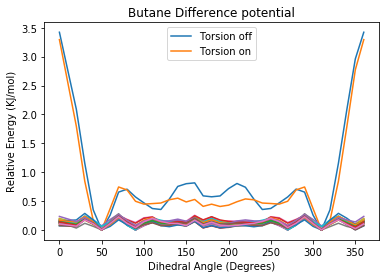

In [12]:
# Difference potential
# look at difference potential
new_param = CharmmParameterSet('../../../../../data/charmm_ff/top_all36_prot.rtf',
                              '../../../../../data/charmm_ff/par_all36_cgenff.prm')
new_struct = butane_scan.remove_nonoptimized()
# parameterize with db_0
par.add_missing(param_list=param_to_opt, param=new_param, sample_n5=True)
with PdfPages('difference_potential_all.pdf') as pdf:
    # Update parameters
    plt.plot(optimized_0.angles, optimized_0.delta_energy-min(optimized_0.delta_energy), label='Torsion off')
    plt.plot(optimized.angles, optimized.delta_energy-min(optimized.delta_energy), label='Torsion on')
    for db in dbs:
        par.update_param_from_sample(param_list=param_to_opt, param=new_param, db=dbs[db], n_5=True, rj=False)

        # Check
        new_struct.compute_energy(new_param)
        plt.plot(new_struct.angles, new_struct.delta_energy - min(new_struct.delta_energy))
        plt.xlabel('Dihedral Angle (Degrees)')
        plt.ylabel('Relative Energy (KJ/mol)')
        plt.title('Butane Difference potential')
    plt.legend()
    pdf.savefig()


In [14]:
[t, g, Neff] = detectEquilibration(dbs['db_0'].sigma[:])

In [18]:
[t_dev, g_de, Neff_dev] = detectEquilibration(dbs['db_0'].deviance[:])

In [27]:
t_sigma = np.zeros((25, 3))
for i, db in tqdm.tqdm(enumerate(dbs)):
    [t, g, Neff] = detectEquilibration(dbs[db].sigma[:])
    t_sigma[i, 0] = t
    t_sigma[i, 1] = g
    t_sigma[i, 2] = Neff

25it [04:57, 12.13s/it]


In [28]:
t_dev = np.zeros((25, 3))
for i, db in tqdm.tqdm(enumerate(dbs)):
    [t, g, Neff] = detectEquilibration(dbs[db].deviance[:])
    t_dev[i, 0] = t
    t_dev[i, 1] = g
    t_dev[i, 2] = Neff
    

25it [05:20, 12.17s/it]


/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


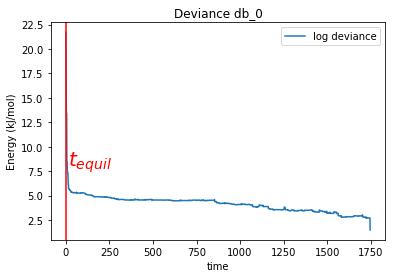

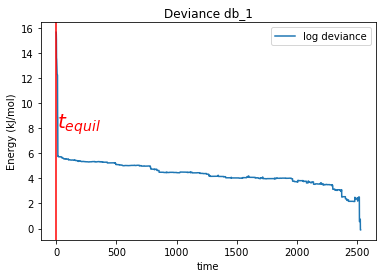

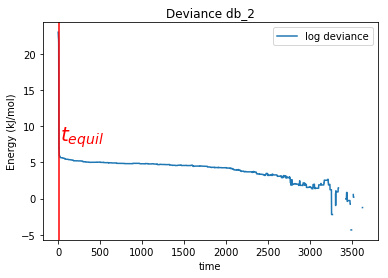

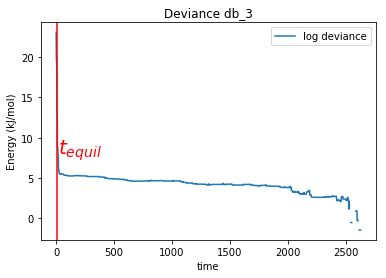

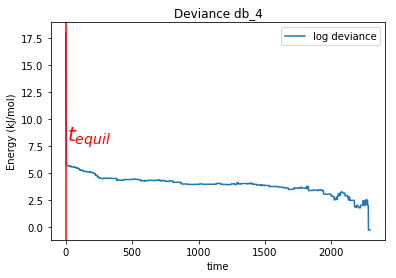

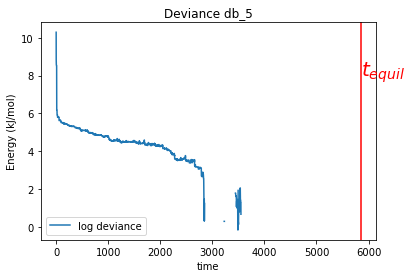

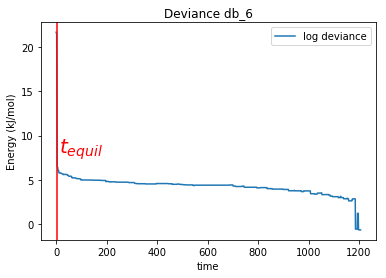

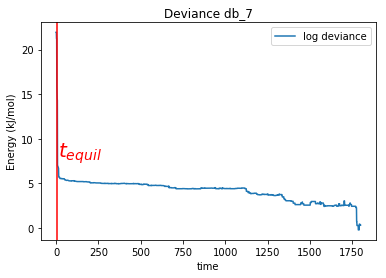

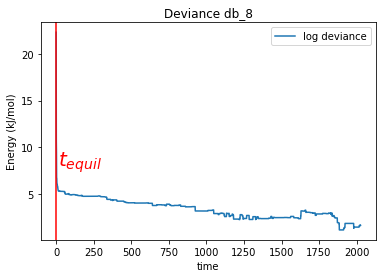

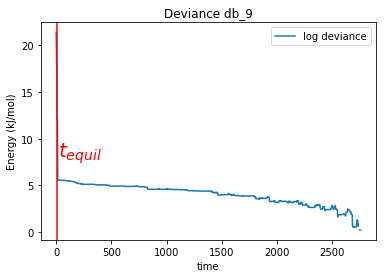

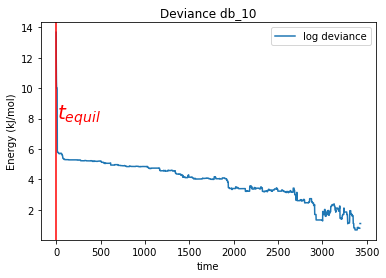

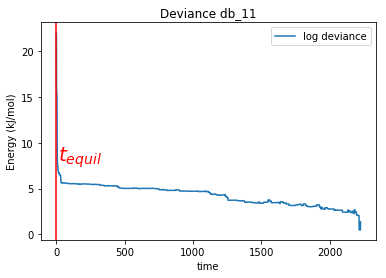

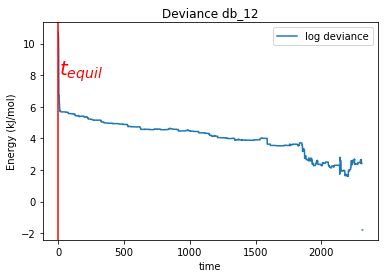

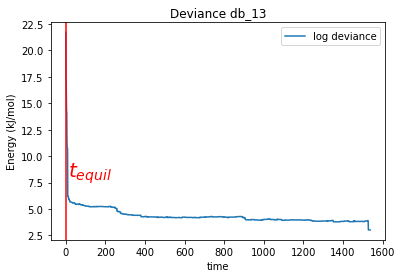

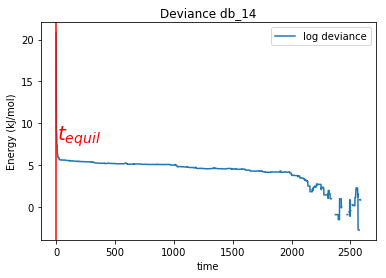

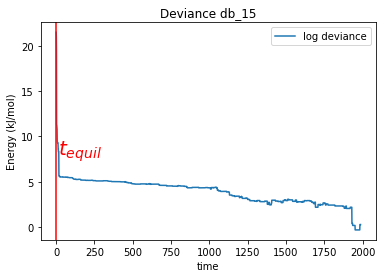

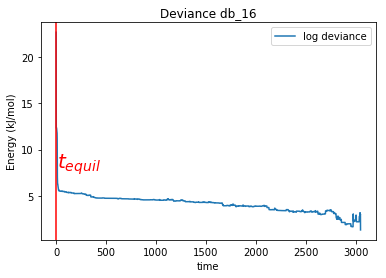

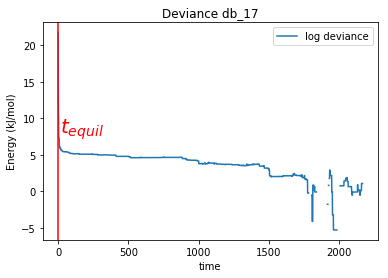

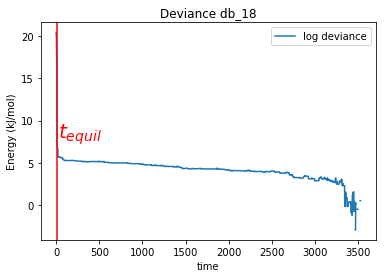

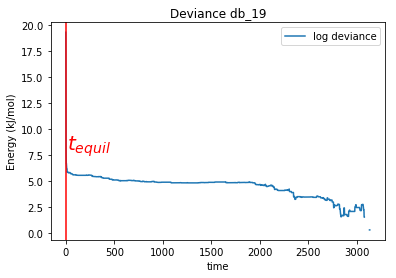

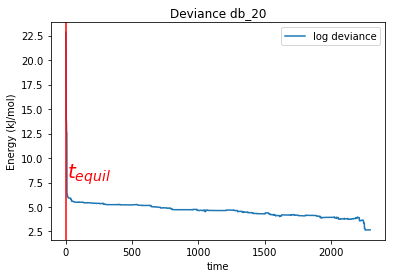

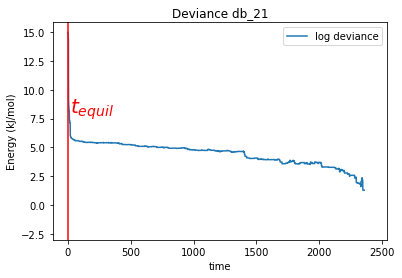

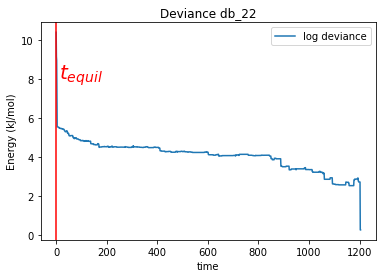

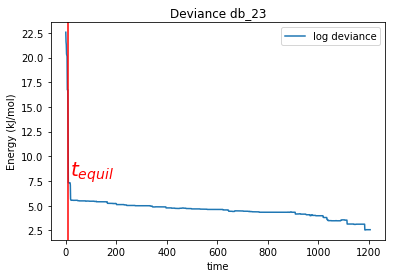

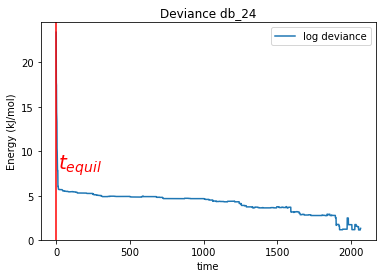

In [29]:
with PdfPages('deviance.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot(np.log(dbs[db].deviance[:]), label='log deviance')
        plt.axvline(t_dev[i,0], color='red')
        plt.text(t_dev[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Deviance {}".format(db))
        pdf.savefig()

/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


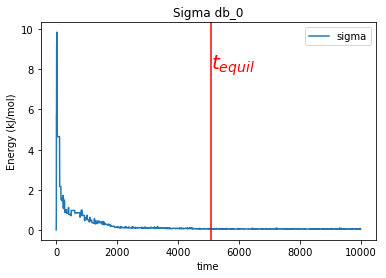

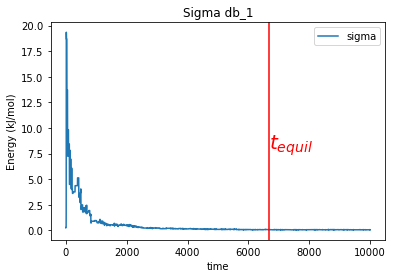

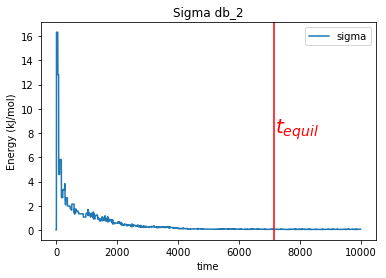

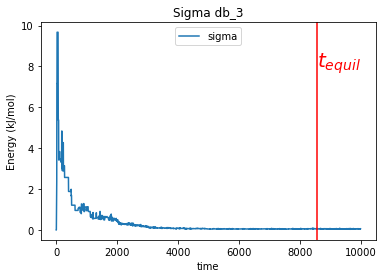

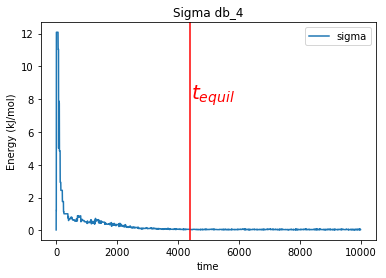

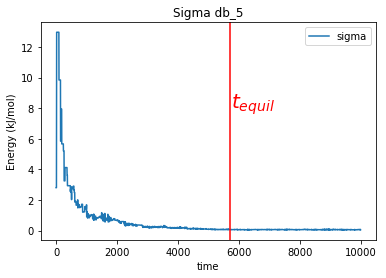

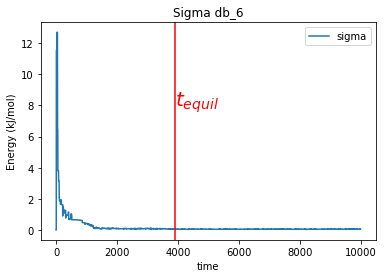

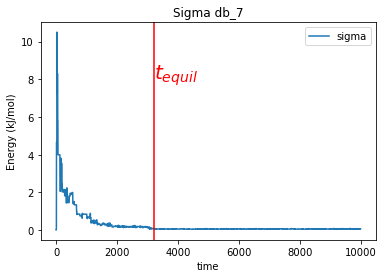

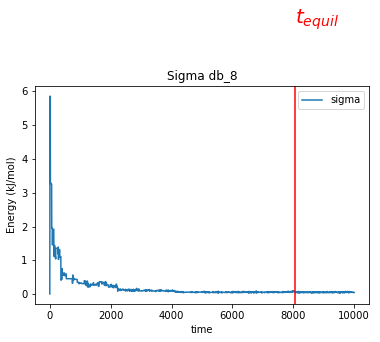

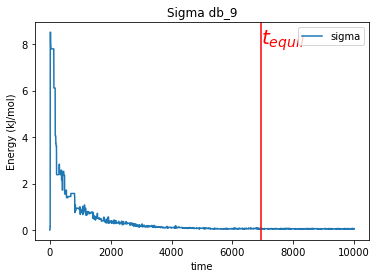

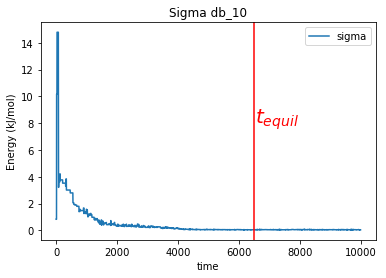

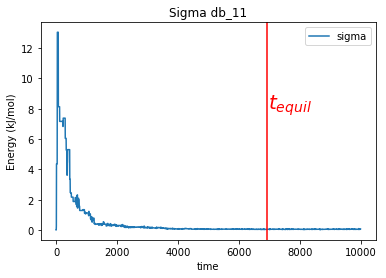

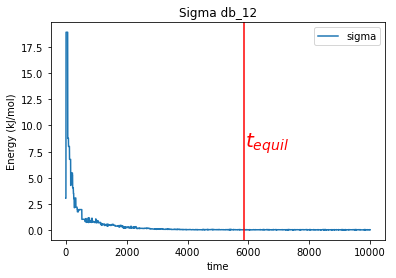

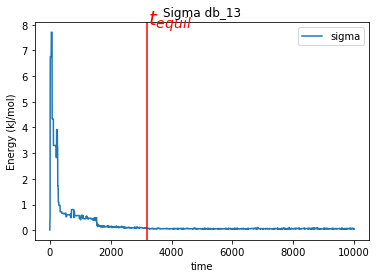

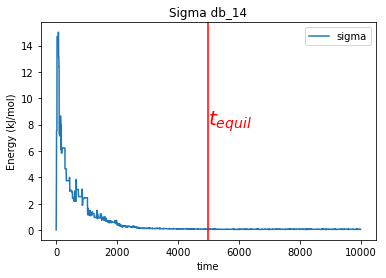

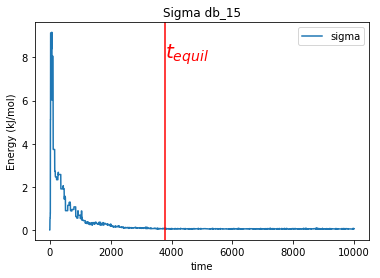

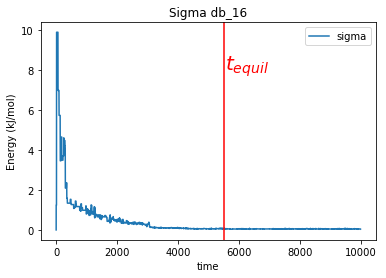

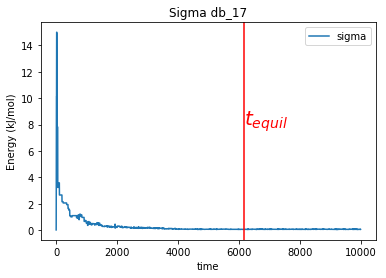

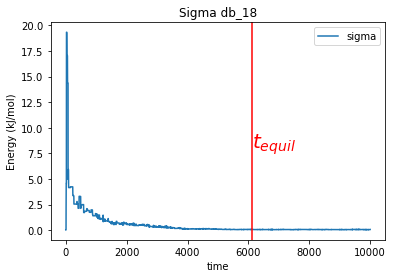

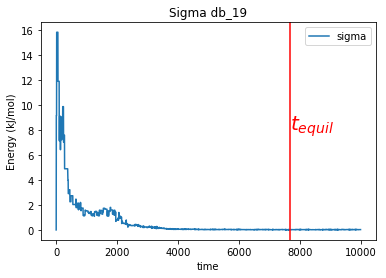

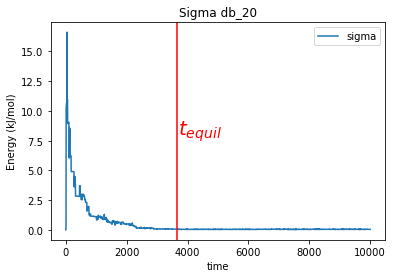

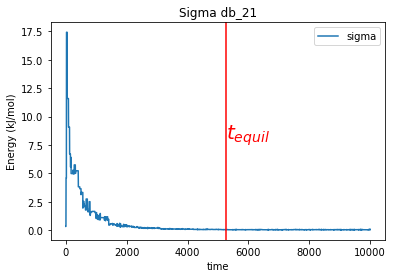

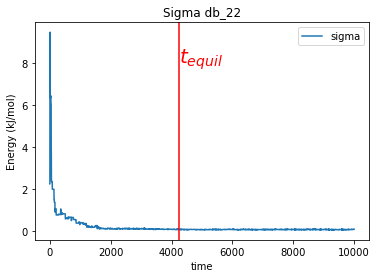

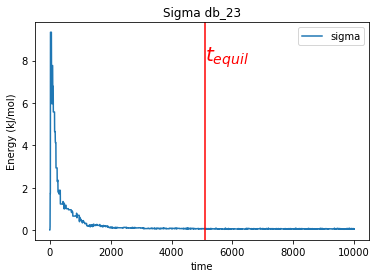

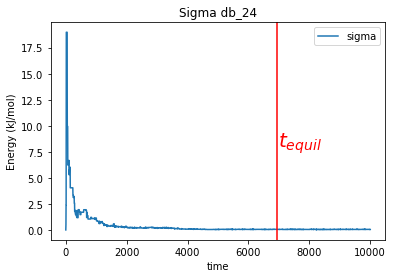

In [32]:
with PdfPages('sigma.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        plt.plot((dbs[db].sigma[:]), label='sigma')
        plt.axvline(t_sigma[i,0], color='red')
        plt.text(t_sigma[i, 0]+10, 8, r'$t_{equil}$', color='red', fontsize=20)
        plt.legend()
        plt.xlabel('time')
        plt.ylabel('Energy (kJ/mol)')
        plt.title("Sigma {}".format(db))
        pdf.savefig()

/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/torsionfit-0+untagged.560.g3807c3e.dirty-py3.5.egg/torsionfit/backends/sqlite_plus.py:153: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return trace[index]
/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


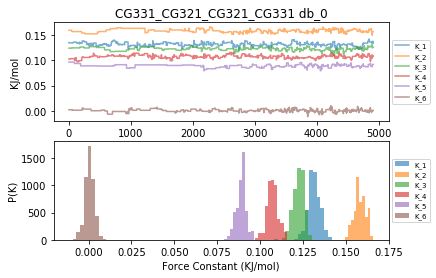

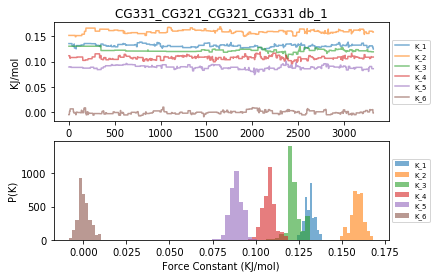

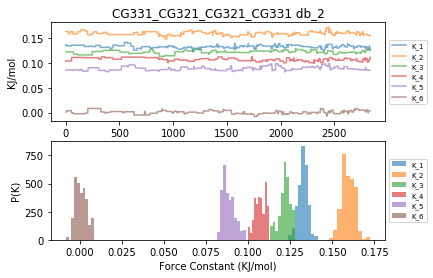

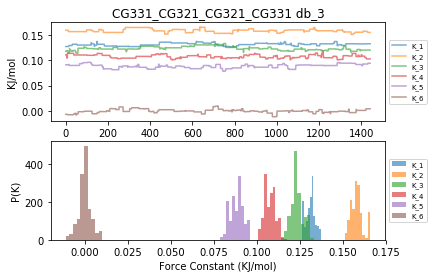

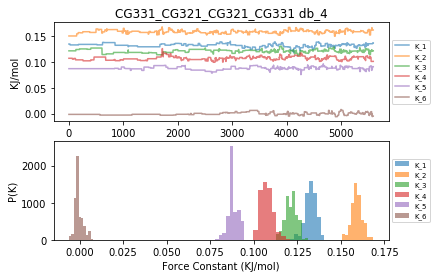

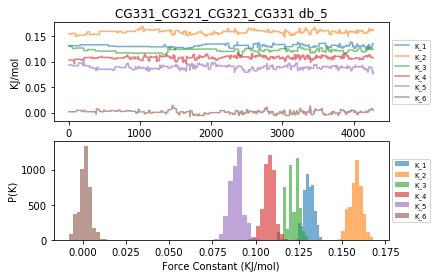

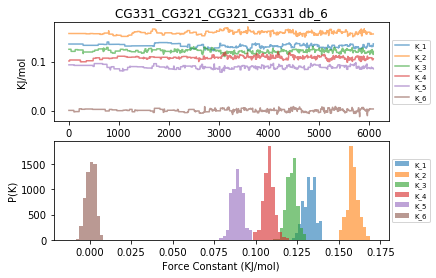

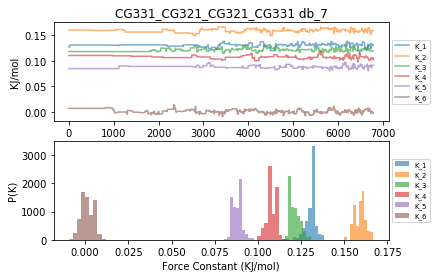

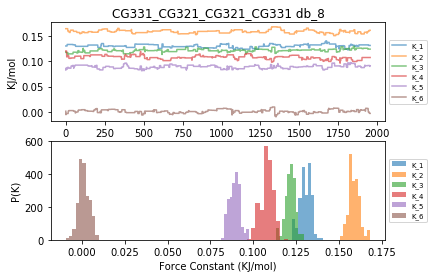

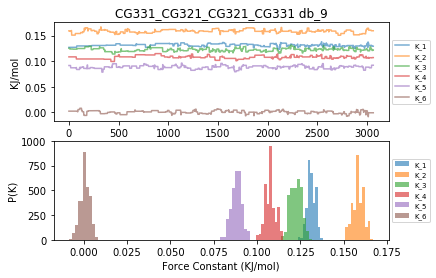

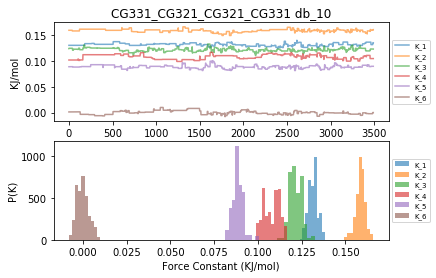

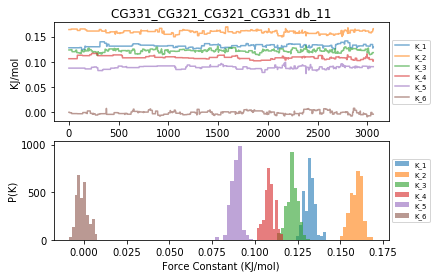

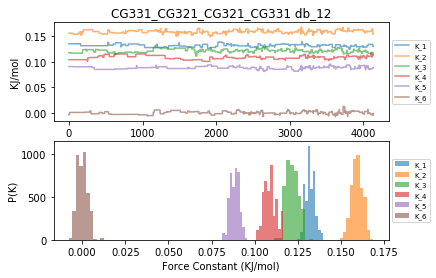

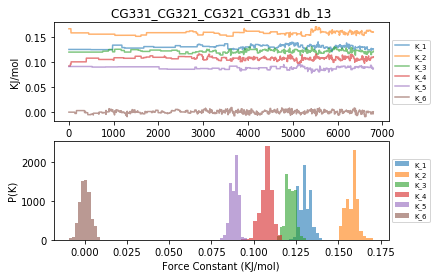

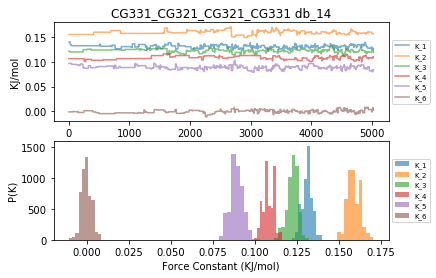

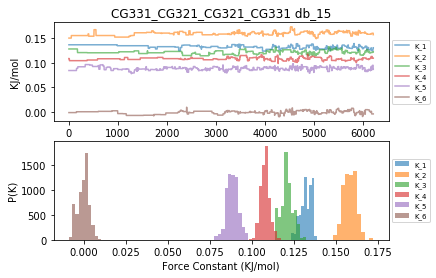

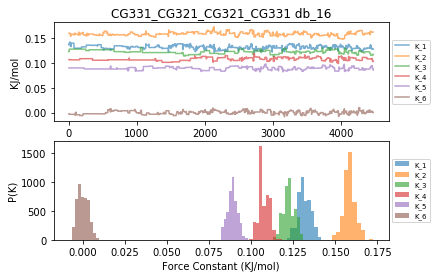

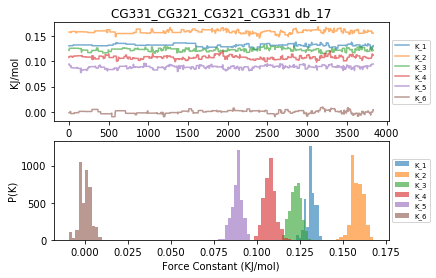

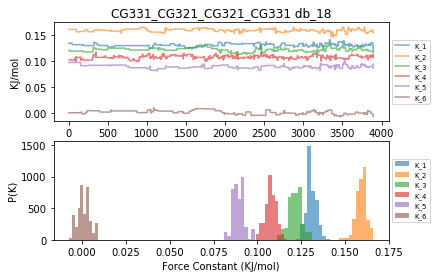

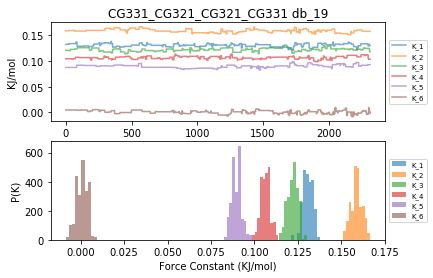

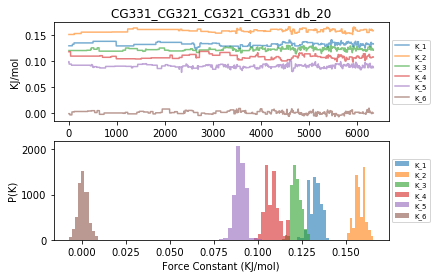

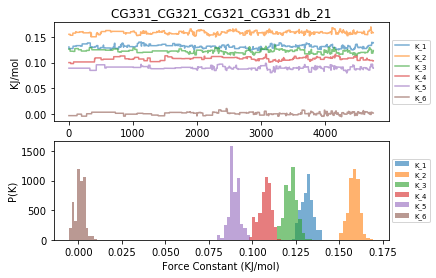

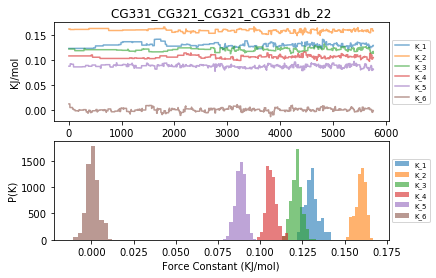

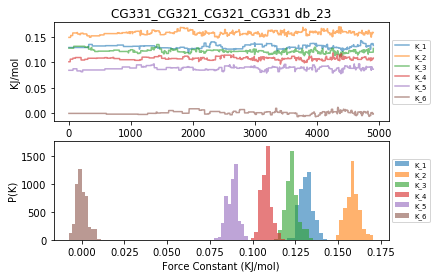

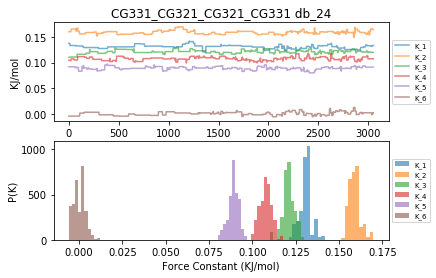

In [35]:
with PdfPages('trace_hist.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        alpha = 0.6
        plt.subplot(2, 1, 1)
        plt.title('CG331_CG321_CG321_CG331 {}'.format(db))
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_1_K')[t_sigma[i,0]:], label='K_1', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_2_K')[t_sigma[i,0]:], label='K_2', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_3_K')[t_sigma[i,0]:], label='K_3', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_4_K')[t_sigma[i,0]:], label='K_4', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_5_K')[t_sigma[i,0]:], label='K_5', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_6_K')[t_sigma[i,0]:], label='K_6', alpha=alpha)
        plt.xlabel('samples')
        plt.ylabel('KJ/mol')
        lgd = plt.legend(prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))

        plt.subplot(2, 1, 2)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_1_K')[t_sigma[i,0]:], label='K_1', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_2_K')[t_sigma[i,0]:], label='K_2', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_3_K')[t_sigma[i,0]:], label='K_3', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_4_K')[t_sigma[i,0]:], label='K_4', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_5_K')[t_sigma[i,0]:], label='K_5', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_6_K')[t_sigma[i,0]:], label='K_6', alpha=alpha)
        plt.xlabel('Force Constant (KJ/mol)')
        plt.ylabel('P(K)')
        lgd = plt.legend(prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
        pdf.savefig()

/Users/chayastern/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


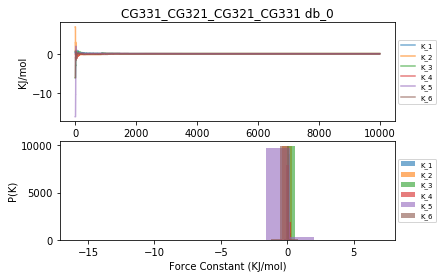

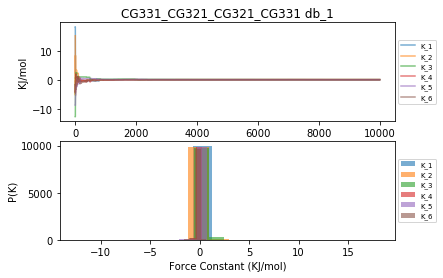

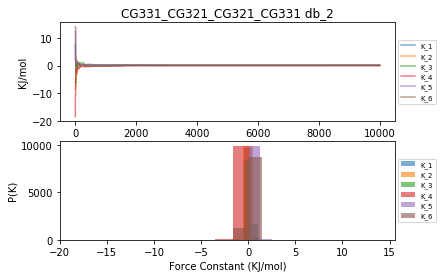

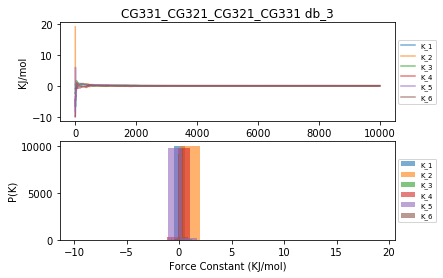

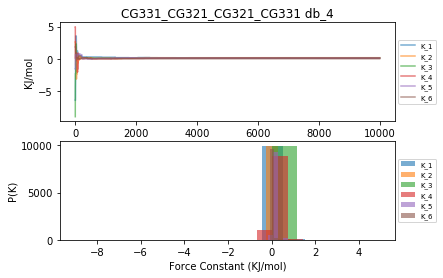

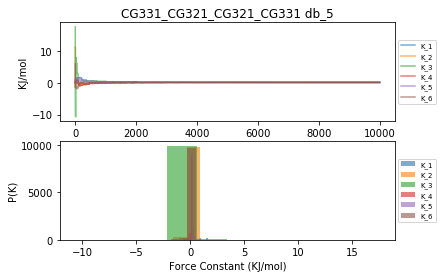

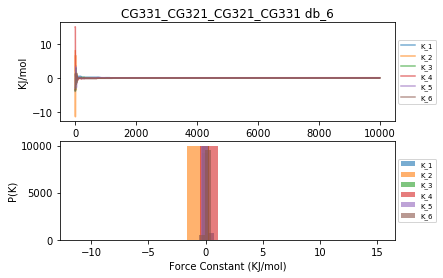

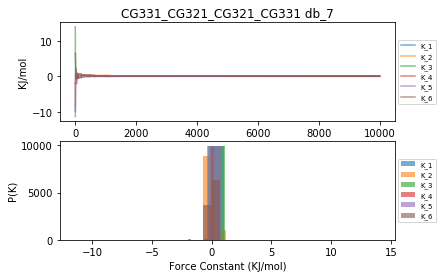

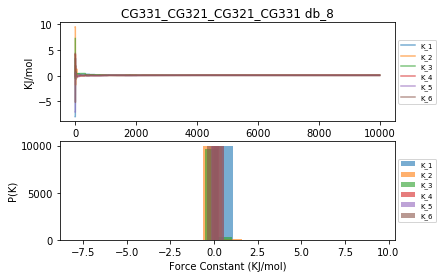

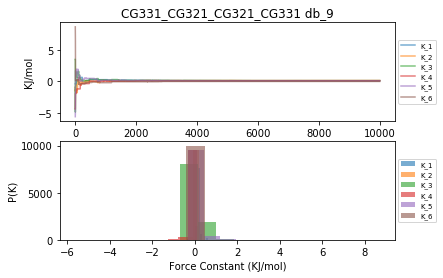

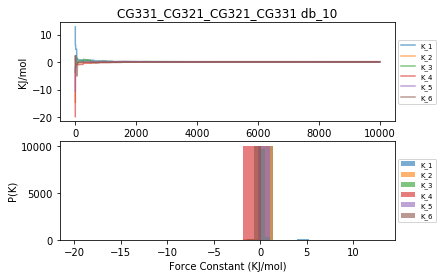

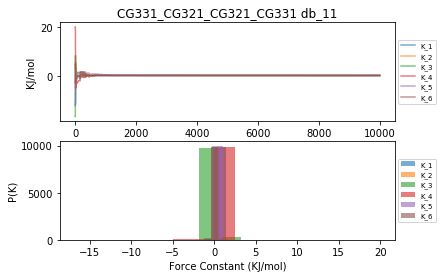

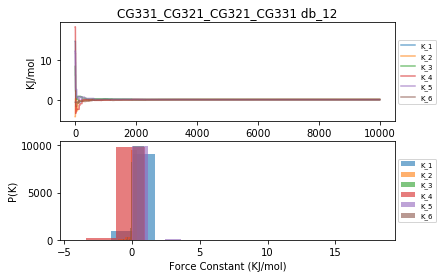

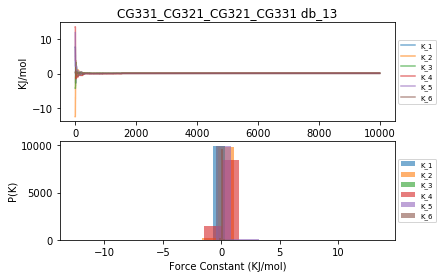

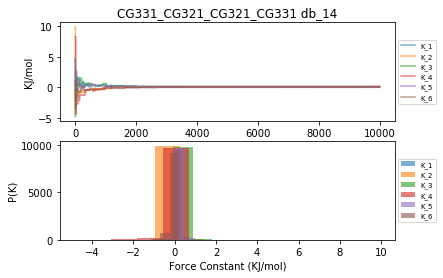

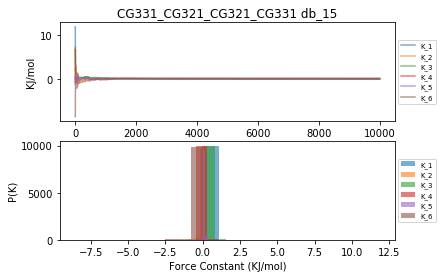

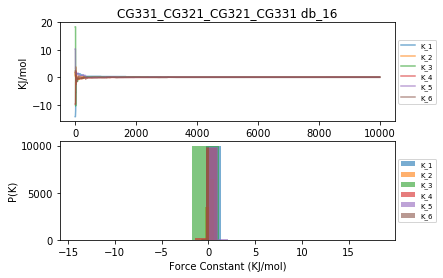

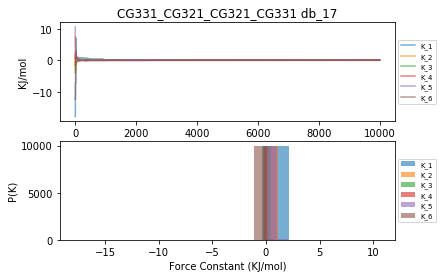

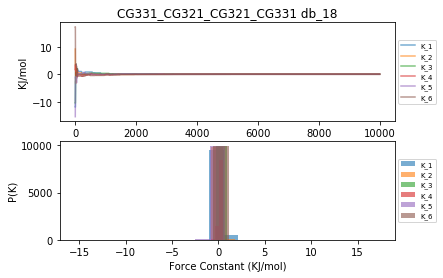

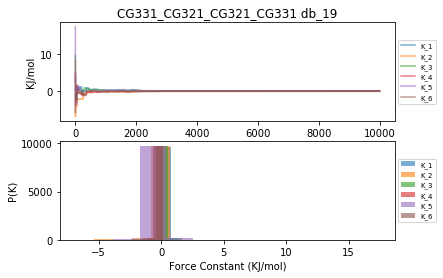

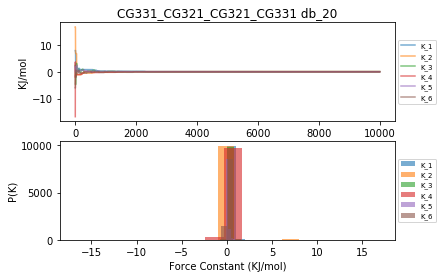

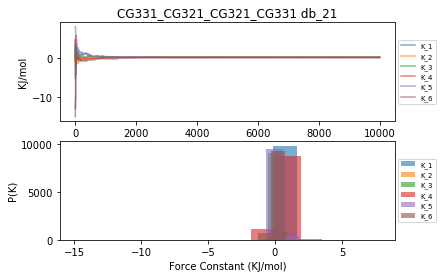

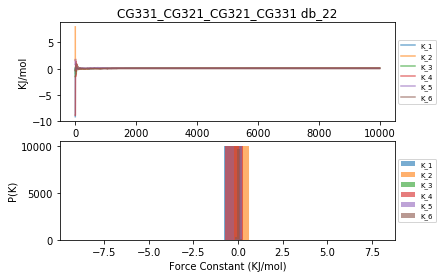

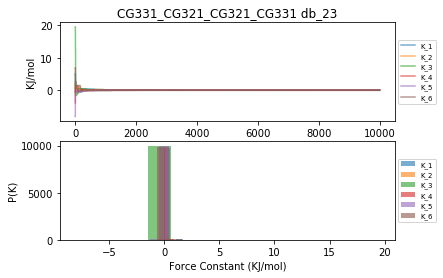

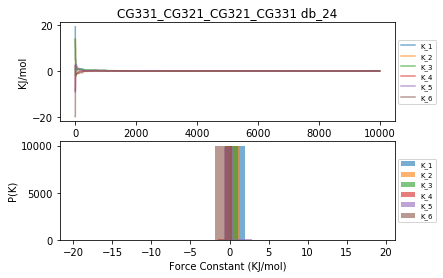

In [36]:
with PdfPages('trace_hist_all.pdf') as pdf:
    for i, db in enumerate(dbs):
        plt.figure()
        alpha = 0.6
        plt.subplot(2, 1, 1)
        plt.title('CG331_CG321_CG321_CG331 {}'.format(db))
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_1_K')[:], label='K_1', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_2_K')[:], label='K_2', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_3_K')[:], label='K_3', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_4_K')[:], label='K_4', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_5_K')[:], label='K_5', alpha=alpha)
        plt.plot(dbs[db].trace('CG331_CG321_CG321_CG331_6_K')[:], label='K_6', alpha=alpha)
        plt.xlabel('samples')
        plt.ylabel('KJ/mol')
        lgd = plt.legend(prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))

        plt.subplot(2, 1, 2)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_1_K')[:], label='K_1', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_2_K')[:], label='K_2', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_3_K')[:], label='K_3', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_4_K')[:], label='K_4', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_5_K')[:], label='K_5', alpha=alpha)
        plt.hist(dbs[db].trace('CG331_CG321_CG321_CG331_6_K')[:], label='K_6', alpha=alpha)
        plt.xlabel('Force Constant (KJ/mol)')
        plt.ylabel('P(K)')
        lgd = plt.legend(prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
        pdf.savefig()